<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Lesson2_EDA_LinReg/AdvancedAnalytics_MLCourse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced analytics

## Цели на сегодня

* дашборды

* изучение взаимосвязи факторов

* причем здесь статистика?

Мы будем работать с датасетом про отток клиентов телекома - в нем содержатся различные характеристики клиентов и информация об оттоке.

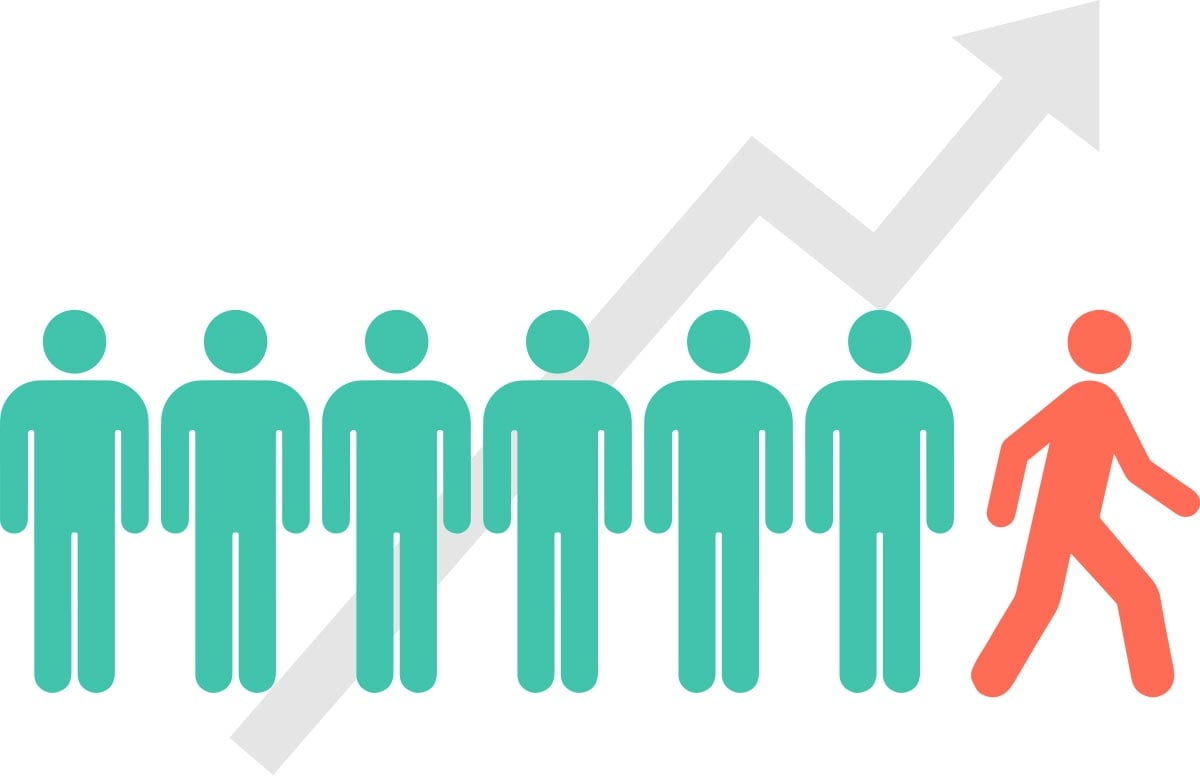

## Описание данных

* `gender` - Whether the customer is a male or a female

* `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)

* `Partner` - Whether the customer has a partner or not (Yes, No)

* `Dependents` - Whether the customer has dependents or not (Yes, No)

* `tenure` - Number of months the customer has stayed with the company

* `PhoneService` - Whether the customer has a phone service or not (Yes, No)

* `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)

* `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)

* `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)

* `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)

* `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)

* `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)

* `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)

* `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)

* `Contract` - The contract term of the customer (Month-to-month, One year, Two year)

* `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)

* `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

* `MonthlyCharges` - The amount charged to the customer monthly

* `TotalCharges` - The total amount charged to the customer

* `Churn` - Whether the customer churned or not (Yes or No)

# Recap

1. Какие цели у аналитики данных?

2. Какие необходимые действия с данными нужно сделать при базовом анализе?

3. Что такое однофакторный анализ?

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CustomerChurn.csv"

In [ ]:
df = pd.read_csv(DATASET)

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ' '

Что не так?
-

-

-

-

-

-

-

-

-

-

-

-

-


In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: '0' if x == ' ' else x)

df['TotalCharges'] = df['TotalCharges'].astype(float)

# Дашборды (или аналитика в одну строчку)

Существует несколько удобных библиотек, которые позволяют построить дашборд с простой аналитикой буквально в одну строчку кода, и сохранить результат в виде html-отчета.

## Pandas profiling

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.9 MB 29.9 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df, title='Pandas Profiling Report')

In [ ]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:01<00:00, 13.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_report.to_file('ChurnClients_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.8 MB/s eta 0:00:00


In [ ]:
import numpy as np

class VisibleDeprecationWarning(Warning):
    """Compatibility patch for old NumPy versions"""
    pass

np.VisibleDeprecationWarning = VisibleDeprecationWarning


import sweetviz as sv

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Autoviz

In [ ]:
!pip install autoviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.8 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.1.1
    Uninstalling xgboost-3.1.1:
      Successfully uninstalled xgboost-3.1.1


In [ ]:
from autoviz import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz(df, chart_format='html')

dft

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (7043, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  10
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  6
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

Saving pair_scatters in HTML format

100%|██████████| 4/4 [00:04<00:00,  1.01s/it]
                                             

Saving distplots_nums in HTML format

  0%|          | 0/2 [00:00<?, ?it/s]
                                     

Saving violinplots in HTML format


No date vars could be found in data set


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format

 97%|█████████▋| 35/36 [00:05<00:00,  7.06it/s]
                                               

Time to run AutoViz (in seconds) = 31


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female        0          Yes       No        1     
1     5575-GNVDE    Male        0           No       No       34     
2     3668-QPYBK    Male        0           No       No        2     
3     7795-CFOCW    Male        0           No       No       45     
4     9237-HQITU  Female        0           No       No        2     
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male        0          Yes      Yes       24     
7039  2234-XADUH  Female        0          Yes      Yes       72     
7040  4801-JZAZL  Female        0          Yes      Yes       11     
7041  8361-LTMKD    Male        1          Yes       No        4     
7042  3186-AJIEK    Male        0           No       No       66     

     PhoneService   MultipleLines   InternetService OnlineSecurity  \
0          No      No phone service            DSL         No        
1         Yes                    No            DSL        Yes        
2         Yes                    No            DSL        Yes        
3          No      No phone service            DSL        Yes        
4         Yes                    No    Fiber optic         No        
...           ...               ...             ...            ...   
7038      Yes                   Yes            DSL        Yes        
7039      Yes                   Yes    Fiber optic         No        
7040       No      No phone service            DSL        Yes        
7041      Yes                   Yes    Fiber optic         No        
7042      Yes                    No    Fiber optic        Yes        

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0         Yes             No             No          No            No        
1          No            Yes             No          No            No        
2         Yes             No             No          No            No        
3          No            Yes            Yes          No            No        
4          No             No             No          No            No        
...           ...              ...         ...         ...             ...   
7038       No            Yes            Yes         Yes           Yes        
7039      Yes            Yes             No         Yes           Yes        
7040       No             No             No          No            No        
7041       No             No             No          No            No        
7042       No            Yes            Yes         Yes           Yes        

         Contract    PaperlessBilling       PaymentMethod         \
0     Month-to-month        Yes                 Electronic check   
1           One year         No                     Mailed check   
2     Month-to-month        Yes                     Mailed check   
3           One year         No        Bank transfer (automatic)   
4     Month-to-month        Yes                 Electronic check   
...              ...              ...                        ...   
7038        One year        Yes                     Mailed check   
7039        One year        Yes          Credit card (automatic)   
7040  Month-to-month        Yes                 Electronic check   
7041  Month-to-month        Yes                     Mailed check   
7042        Two year        Yes        Bank transfer (automatic)   

      MonthlyCharges  TotalCharges Churn  
0          29.85           29.85      No  
1          56.95         1889.50      No  
2          53.85          108.15     Yes  
3          42.30         1840.75      No  
4          70.70          151.65     Yes  
...              ...           ...   ...  
7038       84.80         1990.50      No  
7039      103.20         7362.90      No  
7040       29.60          346.45      No  
7041       74.40          306.60     Yes  
7042      105.65         6844.50      No  

[7043 rows x 21 columns]

## Вспомним о чем данные

In [ ]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [ ]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: '0' if x == ' ' else x)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [ ]:
del df['customerID']

## Исследование данных

Размер датасета

In [ ]:
df.shape

(7043, 20)

Информация о типах данных и пропусках

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Взаимозависимость в данных

### 1. Корреляция

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

In [2]:
# corr = df.corr(numeric_only=True) # матрица корреляций

# sns.heatmap(corr, cmap="Blues", annot=True)

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Корреляционная матрица признаков")
plt.show()

NameError: name 'df' is not defined

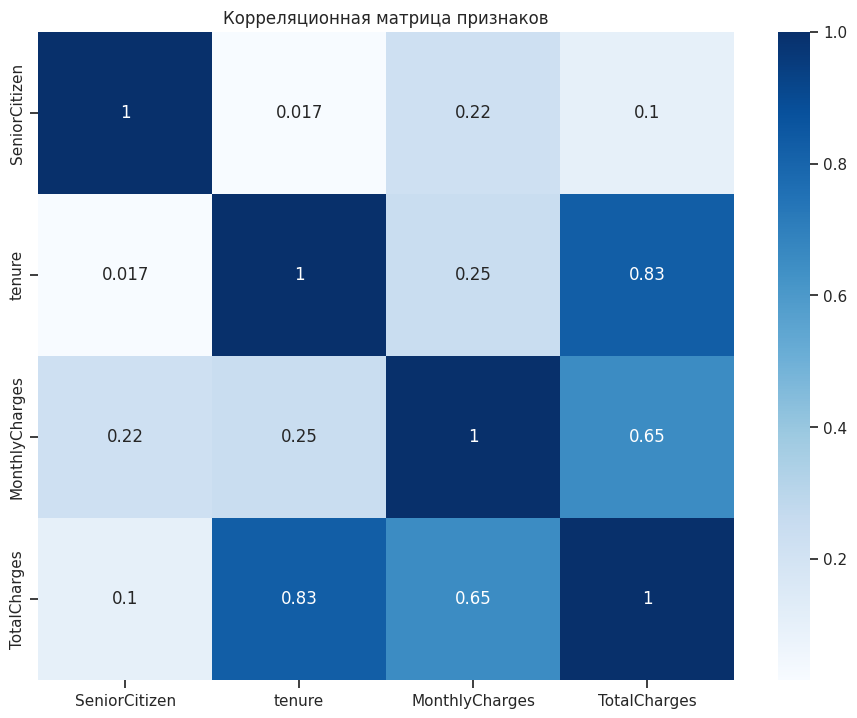

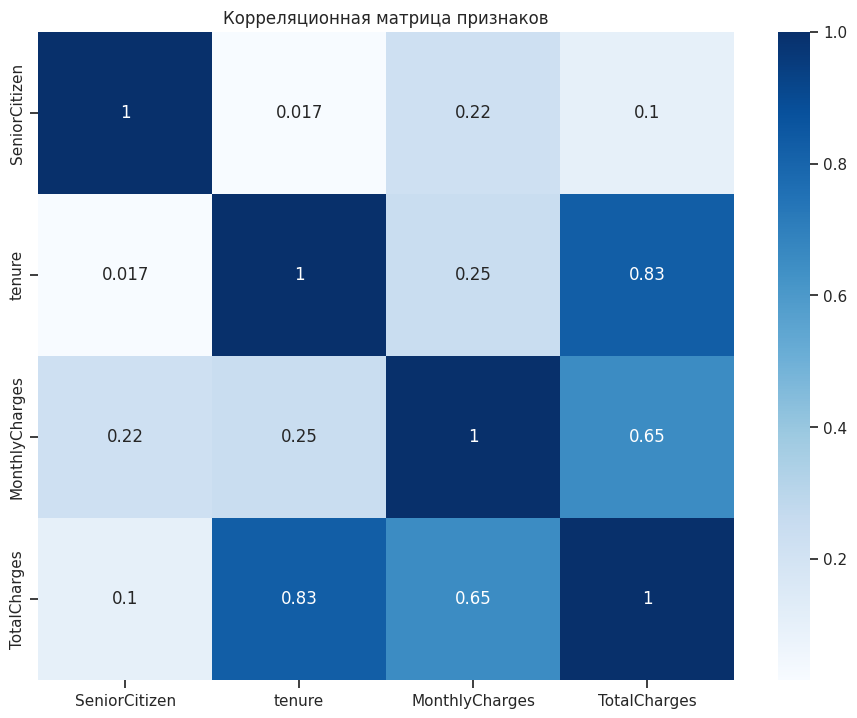

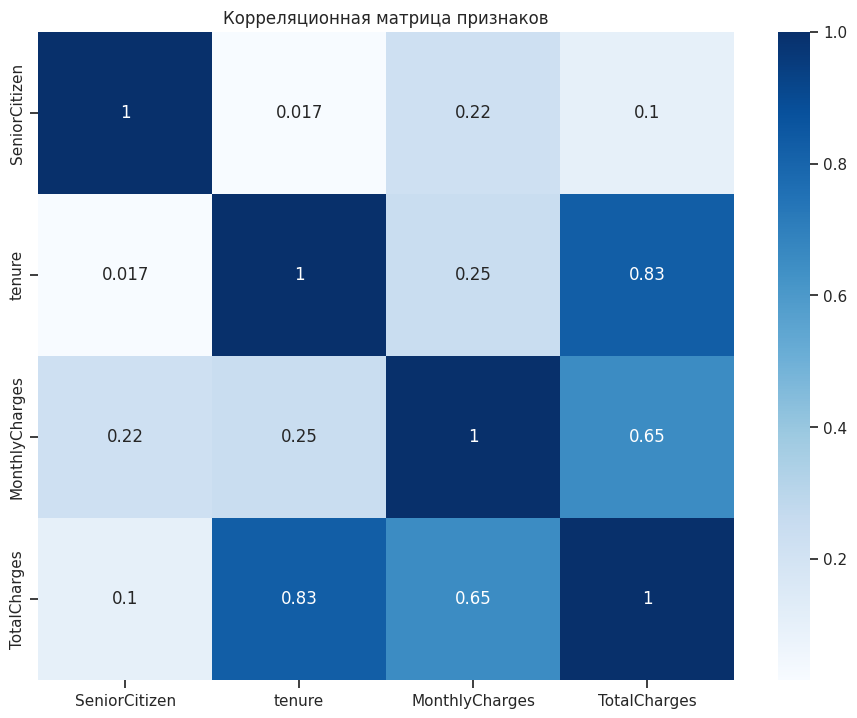

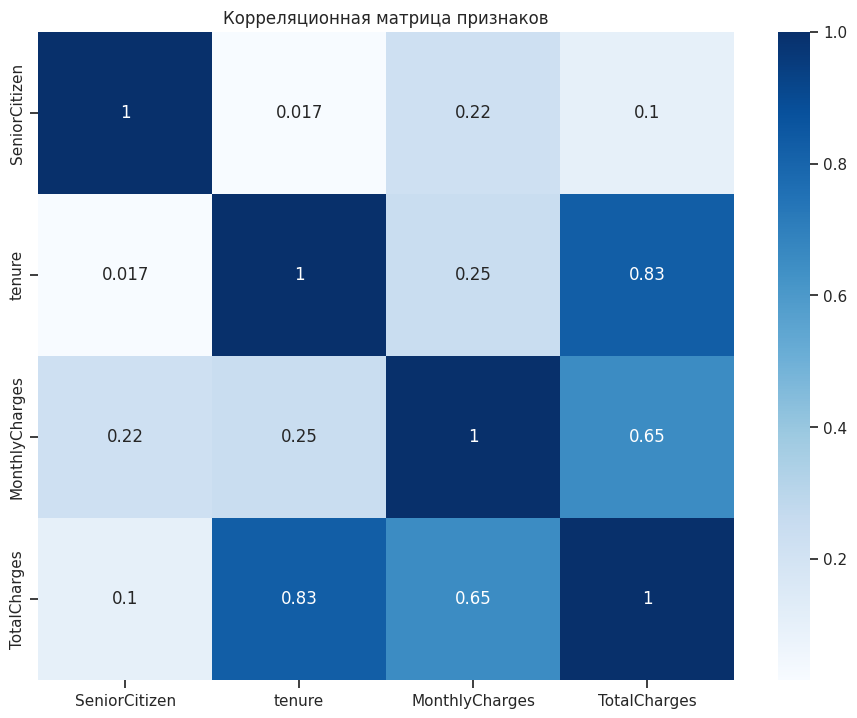

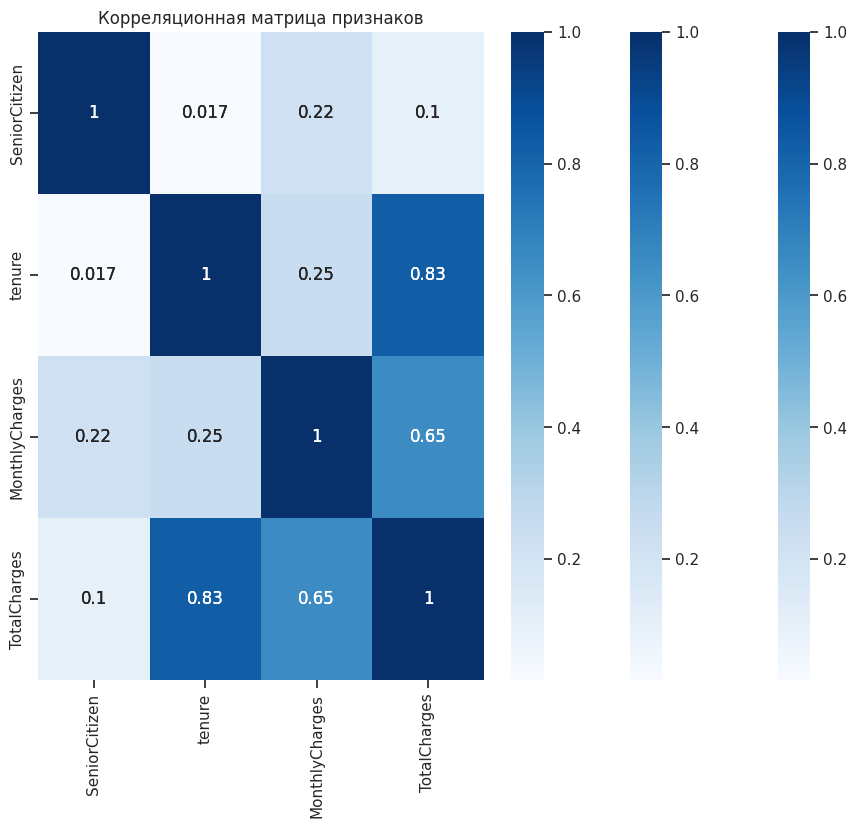

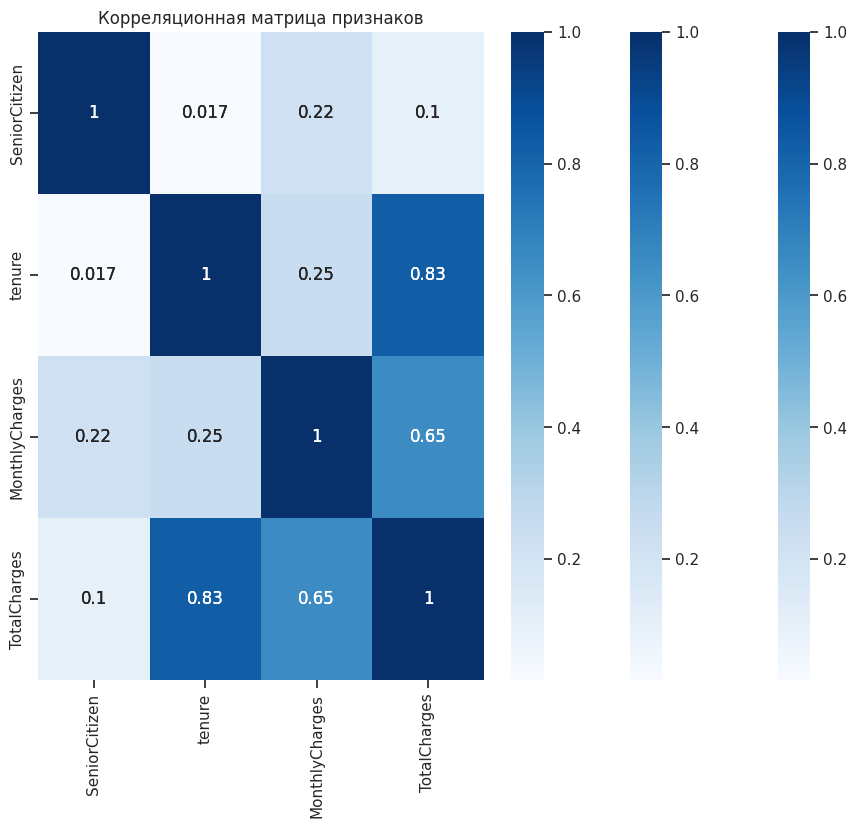

In [ ]:
%matplotlib inline

corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True)
plt.title("Корреляционная матрица признаков")
plt.show()

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

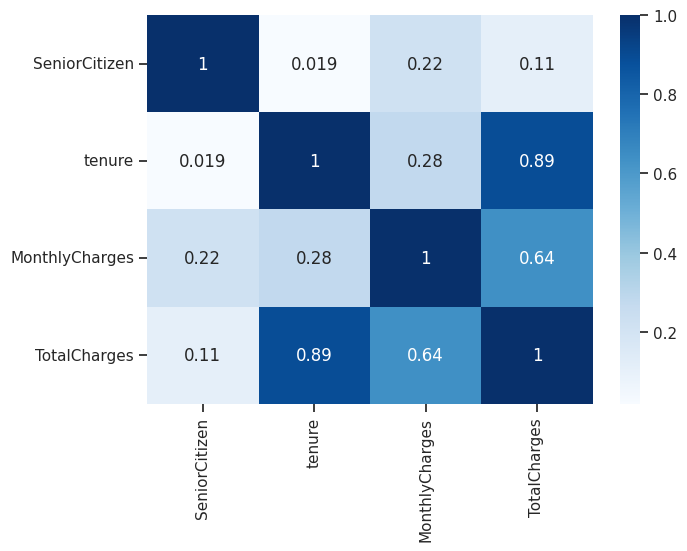

In [ ]:
corr = df.corr(method='spearman', numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True);

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

Вычислим матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

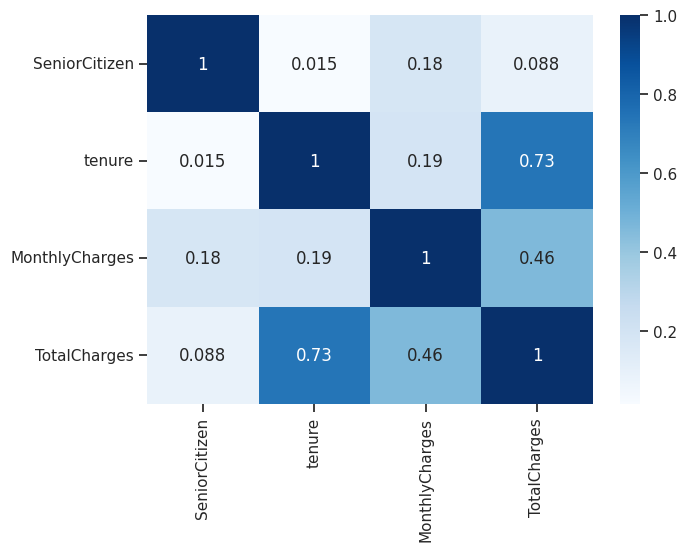

In [ ]:
# your code here

corr = df.corr(method='kendall', numeric_only=True)

sns.heatmap(corr, cmap="Blues", annot=True);

### 2. V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

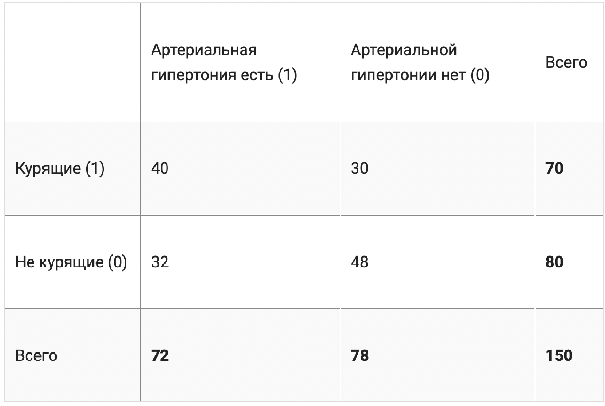

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [ ]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [ ]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

gender   Partner  Dependents  PhoneService  MultipleLines  \
gender            1.000000  0.001808    0.010517      0.006488       0.009452   
Partner           0.001808  1.000000    0.452676      0.017706       0.143898   
Dependents        0.010517  0.452676    1.000000      0.001762       0.025094   
PhoneService      0.006488  0.017706    0.001762      1.000000       1.000000   
MultipleLines     0.009452  0.143898    0.025094      1.000000       1.000000   
InternetService   0.011320  0.000907    0.180267      0.452425       0.396726   
OnlineSecurity    0.017025  0.152010    0.194579      0.176272       0.229608   
OnlineBackup      0.013798  0.153337    0.162760      0.172818       0.245163   
DeviceProtection  0.006029  0.166568    0.157570      0.172317       0.246342   
TechSupport       0.009722  0.127642    0.182377      0.176977       0.230162   
StreamingTV       0.008844  0.137343    0.147082      0.180434       0.261791   
StreamingMovies   0.010641  0.129574    0.141335      0.177520       0.262356   
Contract          0.008153  0.296039    0.244212      0.003976       0.080408   
PaperlessBilling  0.011754  0.014877    0.111377      0.016505       0.166341   
PaymentMethod     0.018646  0.162762    0.150744      0.010297       0.166930   
Churn             0.008612  0.150448    0.164221      0.011942       0.040109   

                  InternetService  OnlineSecurity  OnlineBackup  \
gender                   0.011320        0.017025      0.013798   
Partner                  0.000907        0.152010      0.153337   
Dependents               0.180267        0.194579      0.162760   
PhoneService             0.452425        0.176272      0.172818   
MultipleLines            0.396726        0.229608      0.245163   
InternetService          1.000000        0.724466      0.707184   
OnlineSecurity           0.724466        1.000000      0.718434   
OnlineBackup             0.707184        0.718434      1.000000   
DeviceProtection         0.707108        0.717291      0.719125   
TechSupport              0.722904        0.733071      0.719834   
StreamingTV              0.717099        0.707788      0.714699   
StreamingMovies          0.716008        0.708208      0.713682   
Contract                 0.206921        0.301349      0.258572   
PaperlessBilling         0.378427        0.341800      0.321046   
PaymentMethod            0.313123        0.304959      0.282517   
Churn                    0.322455        0.347400      0.292316   

                  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
gender                    0.006029     0.009722     0.008844         0.010641   
Partner                   0.166568     0.127642     0.137343         0.129574   
Dependents                0.157570     0.182377     0.147082         0.141335   
PhoneService              0.172317     0.176977     0.180434         0.177520   
MultipleLines             0.246342     0.230162     0.261791         0.262356   
InternetService           0.707108     0.722904     0.717099         0.716008   
OnlineSecurity            0.717291     0.733071     0.707788         0.708208   
OnlineBackup              0.719125     0.719834     0.714699         0.713682   
DeviceProtection          1.000000     0.726485     0.733661         0.736047   
TechSupport               0.726485     1.000000     0.716266         0.716327   
StreamingTV               0.733661     0.716266     1.000000         0.771042   
StreamingMovies           0.736047     0.716327     0.771042         1.000000   
Contract                  0.296976     0.331021     0.235901         0.238640   
PaperlessBilling          0.321631     0.329524     0.336061         0.332111   
PaymentMethod             0.287021     0.306888     0.273671         0.274659   
Churn                     0.281580     0.342916     0.230502         0.230951   

                  Contract  PaperlessBilling  PaymentMethod     Churn  
gender            0.008153          0.011754       0

### 3. ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

ANOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [ ]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.3558466424602e-12
Features are correlated


In [ ]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

Category       Numerical Is correlated
0          gender   SeniorCitizen            No
1          gender          tenure            No
2          gender  MonthlyCharges            No
3          gender    TotalCharges            No
4         Partner   SeniorCitizen            No
..            ...             ...           ...
59  PaymentMethod    TotalCharges           Yes
60          Churn   SeniorCitizen           Yes
61          Churn          tenure           Yes
62          Churn  MonthlyCharges           Yes
63          Churn    TotalCharges           Yes

[64 rows x 3 columns]

## $\phi_k$

$\phi_k$ - коэффициент корреляции, который можно вычислять для всех типов признаков. Он основан на вычислении статистики $\chi^2$.

Если говорить грубо, то для категориальных признаков мы просто считаем $\chi^2$, а для числовых - сначала бинаризуем признаки (то есть разбиваем на несколько интервалов значений), а затем также вычисляем $\chi^2$.

В реальности подход чуть сложнее - о нем можно почитать в авторской [статье](https://arxiv.org/abs/1811.11440).


In [ ]:
!pip install phik -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 31.2 MB/s eta 0:00:00


interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


<Axes: >

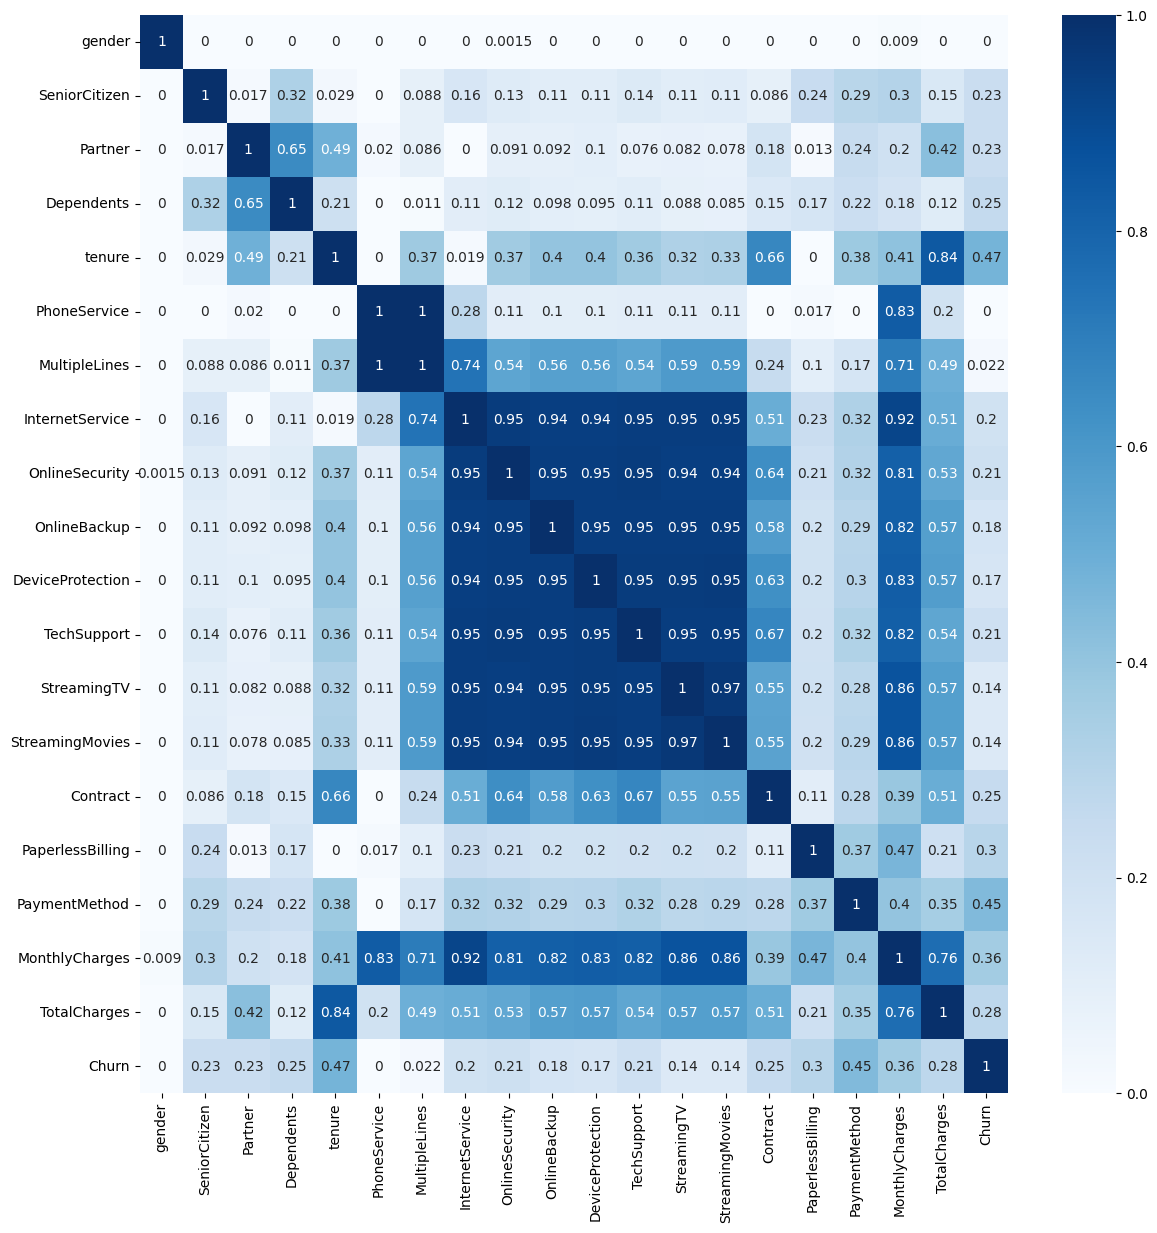

In [ ]:
import phik

plt.figure(figsize=(14,14))

ph = df.phik_matrix()

sns.heatmap(ph, cmap="Blues", annot=True)

In [ ]:
ph.style.background_gradient(cmap='coolwarm')

## Correlation is not causation

По-английски это название произносится очень звучно, а русский аналог такой: корреляция и зависимость - это не одно и то же!

Важно понимать, что коэффициент корреляции - это некоторое число, которое даже если оно близко по модулю к 1, то не дает гарантии, что одна величина зависит (по смыслу) от другой. Хотя зачастую корреляция идет рука об руку с зависимостью.

Поясним.


1) Например, корреляция между уровнем дохода человека и его средним баллом в университете положительная. В данном случае это может означать, что доход человека зависит от среднего балла, так как чем лучше человек учился, тем больше он затем зарабатывает.


2) Другой пример. Корреляция между ростом и весом человека положительная. Но это не означает, что вес напрямую влияет на рост (или наоборот). Скорее всего, есть третий фактор, а именно, возраст, который влияет на оба фактора. То есть чем старше человек, тем больше его рост, и больше его вес. И поэтому корреляция между ростом и весом положительная. Но зависимости между ростом и весом нет.

**Запомните, что корреляция не равна зависимости!**


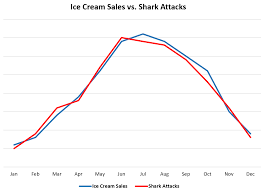

На картинке видно, что продажи мороженого и число атак акул ведут себя одинаково по месяцам. Это означает, что корреляция между этими величинами большая положительная. Но мы же понимаем, что количество продаж мороженого не влияет на нападения акул. Так что здесь есть корреляция, но нет зависимости.

# Немного про проверку гипотез

Часто выводы делаются исключительно по графикам. Давайте добавим строгости и используем аппарат проверки статистических гипотез.

Проверка статистической гипотезы - это проверка некоторого нашего утверждения по данным.

*Например, часто проверяют гипотезу о равенстве средних в двух выборках.*

**ВАЖНО!** Сейчас мы обзорно посмотрим на статистическую проверку гипотез. Подробно она будет разбираться в курсе статистики.

## Влияние gender на отток

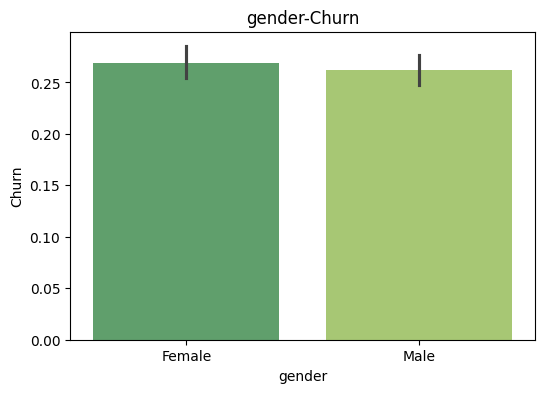

In [ ]:
df['Churn'] = df['Churn'].map({'No' : 0, 'Yes' : 1})

plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='Churn', data = df, palette='summer')
plt.title('gender-Churn')
plt.show();


Давайте пошагово сформулируем, чего мы хотим:

1. **Сформулируем гипотезу:** например, предполагаем, что пол человека как-то влияет или не влияет на отток.

Гипотеза: предполагаем, что пол человека не влияет на отток.

2. **Формулируем нулевую (основную) и альтернативную гипотезы:** нулевая гипотеза всегда состоит в том, что влияния/взаимосвязи нет.

В нашем случае так:

$H_0: \mu_0 = \mu_1,$ где $\mu_0$ - средний отток среди женщин и $\mu_1$ - средний отток среди мужчин

$H_a: \mu_0 \neq \mu_1$

3. **Задаем уровень значимости** - или же $1-p$, где $p$ - вероятность с которой мы допускаем, что тест может ошибиться. Обычно берут $\alpha = 0.95$ (реже $\alpha = 0.99$). Возьмем $\alpha = 0.95$

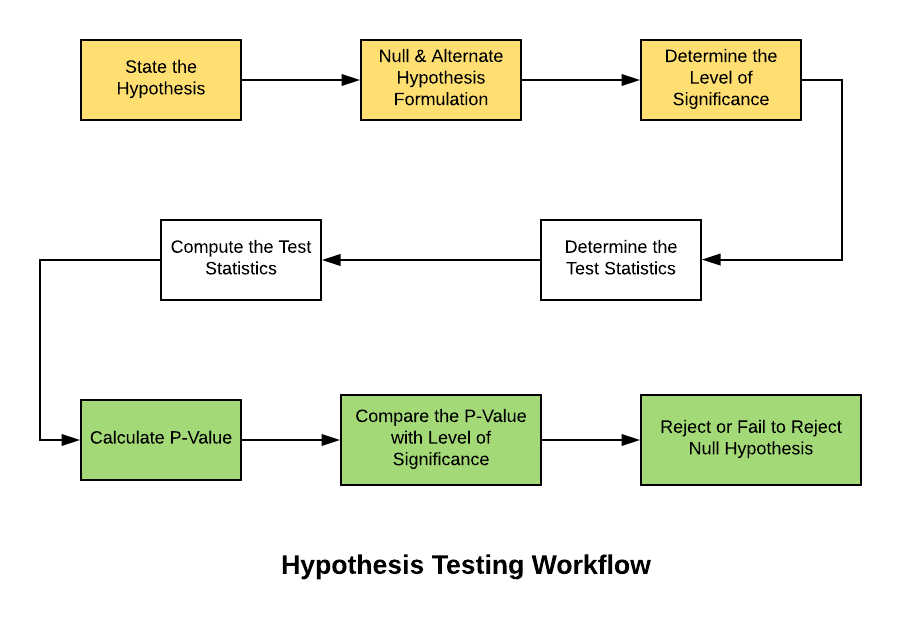

4. **Определяем тест для проверки гипотез.**

* Тесты бывают разные и их очень много: z-тест, t-тест, тест Манна-Уитни, ANOVA, тест Уилкоксона и так далее

* У каждого теста есть область применения - например, какие-то тесты применяются только для нормально распределенных данных, а какие-то - для данных с любым распределением. Некоторые тесты работают только для больших выборок, а некоторые, наоборот, лучше для маленьких.

В нашем случае выборка большая, поэтому можем воспользоваться *z-тестом*.

5. **Подставляем данные в z-тест и вычисляем p-значение. Сравниваем его с уровнем значимости (0.05) и делаем выводы.**

P-value - это вероятность получить значение случайной величины **такое же или более экстремальное** по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.

### Z-test

Вычисляем Z-статистику по формуле:

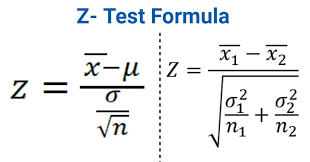

* Z-статистика имеет нормальное распределение

* Если нулевая гипотеза о равенстве средних верна, то значение статистики наиболее вероятно попадет в тело распределения - куда-то около его пика (0). Если же средние различаются, то скорее всего Z-статитика попадет в хвост распределения

* При попадании в хвост мы отвергаем нулевую гипотезу

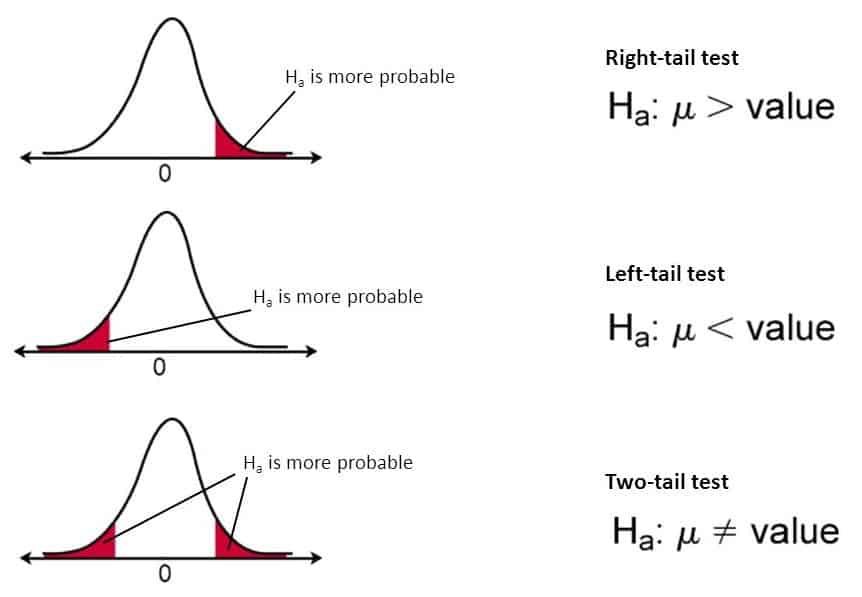

### Алгоритм принятия решения:

* Если вычисленное по данным p-value (площадь под графиком) меньше, чем заданный уровень значимости (например, 0.05) - значит, мы наблюдаем очень редкое событие при условии верности $H_0$ => отвергаем $H_0$.

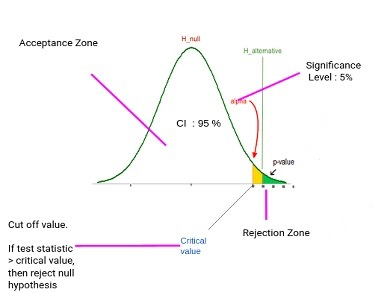

## Влияние gender на отток

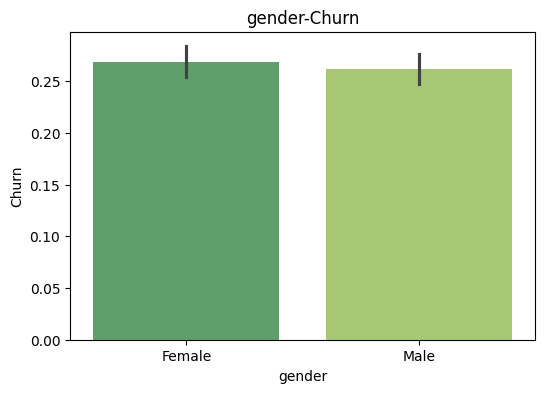

In [ ]:
# df['Churn'] = df['Churn'].map({'No' : 0, 'Yes' : 1})

plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='Churn', data = df, palette='summer')
plt.title('gender-Churn')
plt.show();

Для различных распределений данных и постановок задач существует множество тестов в статистике. Будучи в данной точке нашей программы, мы воспользуемся ChatGPT для выбора подходящего теста.

> Для проверки равенства средних двух независимых выборок из биномиального распределения можно воспользоваться z-тестом для разности долей (z-test for proportions) или t-тестом для независимых выборок, в зависимости от объема выборок и условий задачи.

> Если объем выборок большой (обычно более 30 наблюдений в каждой выборке) и/или известно распределение выборок, то можно использовать z-тест для разности долей. Этот тест подходит для сравнения долей или пропорций в двух независимых выборках.

> Если объем выборок маленький или неизвестно распределение, то можно воспользоваться t-тестом для независимых выборок. Этот тест также подходит для сравнения средних в двух независимых выборках, даже если данные не являются нормально распределенными.





In [ ]:
# ПРИМЕР ПРИМЕНЕНИЯ Z-ТЕСТА

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Создание двух выборок из биномиального распределения
sample1 = np.random.binomial(1, 0.5, 100)  # Пример первой выборки
sample2 = np.random.binomial(1, 0.6, 100)  # Пример второй выборки

# Выполнение z-теста для разности долей
count = np.array([sample1.sum(), sample2.sum()])  # Количество успехов в каждой выборке
nobs = np.array([len(sample1), len(sample2)])     # Общее количество наблюдений в каждой выборке

z_stat, p_value = proportions_ztest(count, nobs)
print("Z-статистика:", z_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Различие статистически значимо")
else:
    print("Различие не является статистически значимым")

Z-статистика: -2.134271987040892
P-значение: 0.032820522966046733
Различие статистически значимо


Применим z-тест, чтобы проверить нашу гипотезу

In [ ]:
sample1 = df[df.gender == 'Female']['Churn']
sample2 = df[df.gender == 'Male']['Churn']

count = np.array([sample1.sum(), sample2.sum()])
nobs = np.array([len(sample1), len(sample2)])

z_stat, p_value = proportions_ztest(count, nobs)
print("Z-статистика:", z_stat)
print("P-значение:", p_value)

if p_value < 0.05:
    print("Различие статистически значимо")
else:
    print("Различие не является статистически значимым")

Z-статистика: 0.7227492672834878
P-значение: 0.4698339411426554
Различие не является статистически значимым


## Влияние tenure на отток

<ipython-input-4-c635104b15c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='tenure', data = df, palette='summer')


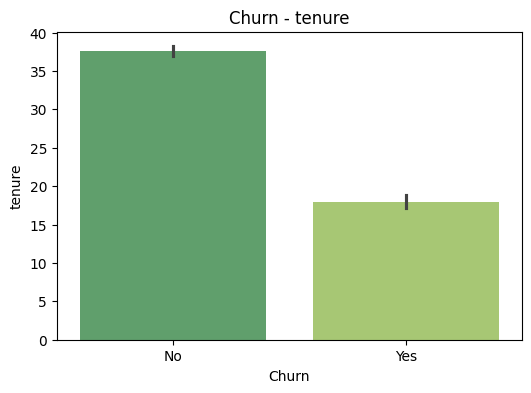

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Churn', y='tenure', data = df, palette='summer')
plt.title('Churn - tenure')
plt.show()

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

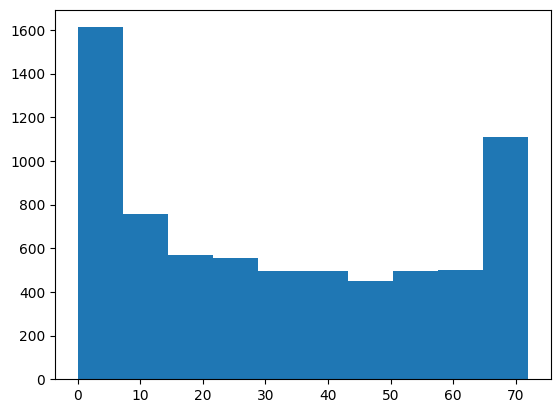

In [ ]:
plt.hist(df.tenure)

> Если распределение данных не является нормальным, то для проверки различия в средних двух выборок можно использовать непараметрические статистические тесты.

> Тест Манна-Уитни (Mann-Whitney U test): Этот непараметрический тест используется для проверки гипотезы о равенстве средних значений двух независимых выборок.


## Тест Манна-Уитни

In [ ]:
# ПРИМЕР ПРИМЕНЕНИЯ U-ТЕСТА

from scipy.stats import mannwhitneyu

# Пример двух выборок (data1 и data2)
data1 = [1, 2, 3, 4, 5]
data2 = [6, 7, 8, 9, 10]

# Выполняем тест Манна-Уитни
statistic, p_value = mannwhitneyu(data1, data2)

# Выводим результаты теста
print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

# Проверяем гипотезу о различии средних на уровне значимости 0.05
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 0.0
p-значение: 0.007936507936507936
Отвергаем нулевую гипотезу: средние значимо различаются


Применим тест Манна-Уитни для проверки нашей гипотезы

In [ ]:
sample1 = df[df.Churn == 1]['tenure']
sample2 = df[df.Churn == 0]['tenure']

statistic, p_value = mannwhitneyu(sample1, sample2)

print("Статистика теста Манна-Уитни:", statistic)
print("p-значение:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значимо различаются")
else:
    print("Нет оснований отвергать нулевую гипотезу: средние не различаются")

Статистика теста Манна-Уитни: 2515538.0
p-значение: 2.419635517951866e-208
Отвергаем нулевую гипотезу: средние значимо различаются


## Как выбрать подходящий статистический тест?

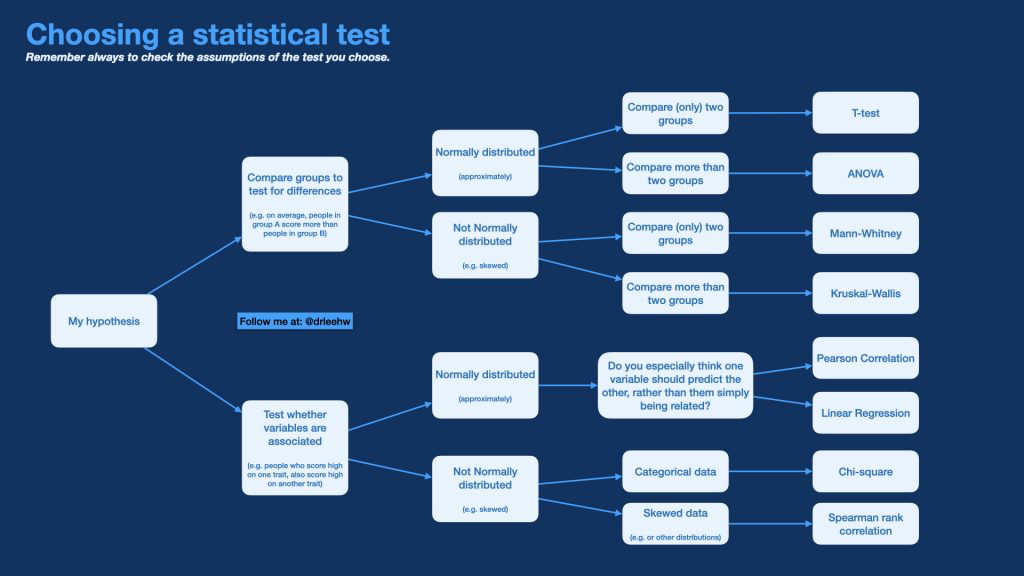